<img src='https://media1.giphy.com/media/rqyvY6FHORTEs/giphy.gif' width=100px>

<h1>Applied Text Mining and Sentiment Analysis with Python</h1>

Welcome! 




<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview



In this section, we are going to have a look at the dataset that we will use all along the course.

If you prefer not to use any Google apps for this course, it's totally fine ... You can simply download this notebook together with the dataset and use them with your favourite IDE (Pycharm / Spyder / Jupyter Notebook / ...)! No constraint here 🙃

... In any case, enjoy!

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Load and analyze Dataset

Very useful packages for Data Analysis.





In [36]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

* Use the `sample` method to look at some random tweets present in our dataset

* Check how many tweets there are in total

In [37]:
import pandas as pd

# Read the dataset from CSV file
df = pd.read_csv("data/depressive_tweets_processed.csv", delimiter="|", header=None, on_bad_lines="skip")

# Assign column names
df.columns = ["ID", "Date", "Time", "Timezone", "Username", "Text", "Sentiment", "Label1", "Label2", "Other1"]

# Drop unnecessary columns
df = df.drop(["Label1", "Label2", "Other1"], axis=1)

# # Display the DataFrame
df.sample(20)


,ID,Date,Time,Timezone,Username,Text,Sentiment
874,989212295074021376,2018-04-25,18:39:24,Eastern Standard Time,hovseofel,Why does depression like. Exist,1.0
1931,989104527956733953,2018-04-25,11:31:10,Eastern Standard Time,marisasimonee,if i had to describe depression in a weather f...,0.0
2269,989037761905733634,2018-04-25,07:05:52,Eastern Standard Time,WolfAngel6481,All I can say is Depression sucks!! #mentalhealth,0.0
262,989254833571028992,2018-04-25,21:28:26,Eastern Standard Time,VickyWuDavis,@yahoolifestyle Dwayne Johnson praised for ope...,0.0
1702,989126204925136901,2018-04-25,12:57:18,Eastern Standard Time,Lemeeseethat,@Michellebudd If their is a point beyond depre...,1.0
1645,989128899027234816,2018-04-25,13:08:01,Eastern Standard Time,yaboyneatz,1-800-273-8255 - suicide hotline877-226-3111 -...,0.0
2237,989043181726633984,2018-04-25,07:27:24,Eastern Standard Time,princessSoru,ugh sorry for being gross on main. depression ...,0.0
2268,989041962283040768,2018-04-25,07:22:33,Eastern Standard Time,PsychologyTip,More than 1 in 20 US children and teens have a...,0.0
1666,989128443227930625,2018-04-25,13:06:12,Eastern Standard Time,Japes_USU,Considered as one of the hottest place on Eart...,0.0
1342,989160961536856066,2018-04-25,15:15:25,Eastern Standard Time,REALrunryan,Depression affects us all but for some it coul...,0.0


In [38]:
# Filter rows with sentiment value of 1.0
filtered_df = df[df["Sentiment"] == 1.0]
len(filtered_df)

451

In [39]:
filtered_df

,ID,Date,Time,Timezone,Username,Text,Sentiment
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1.0
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1.0
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,1.0
14,989290871269998592,2018-04-25,23:51:38,Eastern Standard Time,Jailbait_bby,@QinniArt This kinda reminds me of when o was ...,1.0
16,989290803859283968,2018-04-25,23:51:22,Eastern Standard Time,roseparkchaeng,@Razer Depression,1.0
...,...,...,...,...,...,...,...
2289,989037236552429568,2018-04-25,07:03:47,Eastern Standard Time,Akshay7_,@snehliverbird Forget about the post Klopp era...,1.0
2291,989037180113825793,2018-04-25,07:03:33,Eastern Standard Time,giftedchoice_,Depression's such a villainous state,1.0
2300,989037040875515905,2018-04-25,07:03:00,Eastern Standard Time,hairflipswift13,"My girl made it to season 4, dealing with her ...",1.0
2311,989036757885865984,2018-04-25,07:01:53,Eastern Standard Time,ZukaroTravon,"And I guess, I just have to make sacrifices if...",1.0


In [25]:
# Assign column names
# Drop unnecessary columns
filtered_df = filtered_df.drop(["ID", "Date", "Time", "Timezone", "Username"], axis=1)
filtered_df

,Text,Sentiment
0,The lack of this understanding is a small but ...,1.0
1,i just told my parents about my depression and...,1.0
3,Made myself a tortilla filled with pb&j. My de...,1.0
14,@QinniArt This kinda reminds me of when o was ...,1.0
16,@Razer Depression,1.0
...,...,...
2289,@snehliverbird Forget about the post Klopp era...,1.0
2291,Depression's such a villainous state,1.0
2300,"My girl made it to season 4, dealing with her ...",1.0
2311,"And I guess, I just have to make sacrifices if...",1.0


In [13]:
# Convert "Sentiment" column to numeric data type
filtered_df["Sentiment"] = pd.to_numeric(filtered_df["Sentiment"], errors="coerce")

# Change the sentiment values from 1.0 to 1
filtered_df["Sentiment"] = filtered_df["Sentiment"].replace(1.0, 1)

# Convert "Sentiment" column to integer data type
filtered_df["Sentiment"] = filtered_df["Sentiment"].astype(int)

# Display the updated DataFrame
print(filtered_df.head())


                    ID        Date      Time               Timezone  \
0   989292962323615744  2018-04-25  23:59:57  Eastern Standard Time   
1   989292959844663296  2018-04-25  23:59:56  Eastern Standard Time   
3   989292873664393218  2018-04-25  23:59:35  Eastern Standard Time   
14  989290871269998592  2018-04-25  23:51:38  Eastern Standard Time   
16  989290803859283968  2018-04-25  23:51:22  Eastern Standard Time   

          Username                                               Text  \
0         whosalli  The lack of this understanding is a small but ...   
1      estermnunes  i just told my parents about my depression and...   
3       _ojhodgson  Made myself a tortilla filled with pb&j. My de...   
14    Jailbait_bby  @QinniArt This kinda reminds me of when o was ...   
16  roseparkchaeng                                  @Razer Depression   

    Sentiment  
0           1  
1           1  
3           1  
14          1  
16          1  


C:\Users\hp\AppData\Local\Temp\ipykernel_12928\2558825284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Sentiment"] = pd.to_numeric(filtered_df["Sentiment"], errors="coerce")
C:\Users\hp\AppData\Local\Temp\ipykernel_12928\2558825284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Sentiment"] = filtered_df["Sentiment"].replace(1.0, 1)
C:\Users\hp\AppData\Local\Temp\ipykernel_12928\2558825284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [34]:
# Save the limited_new_data DataFrame to a new CSV file
filtered_df.to_csv("Depressive_tweets.csv", index=False)

print("Positive tweets saved successfully.")

Positive tweets saved successfully.


* Print a tweet and its sentiment based on a tweet ID

In [17]:
tweet_id = 145
tweet = filtered_df.iloc[tweet_id]

In [18]:
print("Tweet: {}".format(tweet["Text"]))
print("Tweet sentiment: {}".format(tweet["Sentiment"]))

Tweet: @TroyNel16190599 Sucking my dick cures depression
Tweet sentiment: 1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Dataset Visualization

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.2.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [40]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

* Print the count of positive and negative tweets

In [41]:
print("Number of 1.0 tweets: {}".format(filtered_df[filtered_df["Sentiment"]==1.0].count()[0]))

Number of 1.0 tweets: 451


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.2.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [52]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

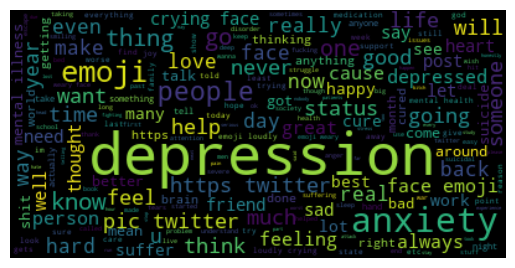

In [54]:
pos_tweets = filtered_df[filtered_df["Sentiment"] == 1.0]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["Text"] if not pd.isnull(tweet))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


* ... and in negative tweets?

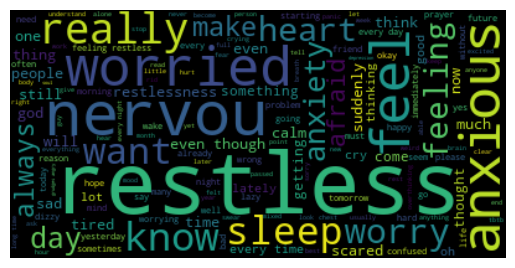

In [725]:
pos_tweets = df[df["label"] == 1.0]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["text"] if not pd.isnull(tweet))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [726]:
print(df.columns)


Index(['text', 'label'], dtype='object')


That's it for this section! 

See you in `Section 2` where we will talk about Text Normalization and get our hands dirty with some real tweets!

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [727]:
import re

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [728]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [729]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [730]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [731]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [732]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

* Import the installed package

In [733]:
import emoji

* Replace emojis with a meaningful text

In [734]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [735]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [736]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [737]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [738]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [739]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [740]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [741]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [742]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [743]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [744]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [745]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [746]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

* Install the `contractions` package

* Import the installed package

In [747]:
import contractions

* Use `contractions_dict` to list most common contractions

In [748]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [749]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [750]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [751]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [752]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [753]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple tweet to be tokenized

In [754]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [755]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [756]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

* Import the `string` package 

In [757]:
import string

* Retrieve english punctuation signs by using the `string` package

In [758]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [759]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of english stopwords

In [760]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'between', 'some', 'he', 're', 'been', 'should', "isn't", 'mightn', 'weren', 'himself', 'be', "hadn't", "don't", 'haven', 'before', 'than', "you'd", 'isn', 'once', 'does', 'its', 'themselves', 'is', "needn't", "it's", 'no', 'having', 'from', 'then', 'needn', 'when', 'herself', 'by', 'will', 'can', 'too', 'over', 'into', 'above', 'mustn', 'down', 'nor', 'do', 'very', 've', "shouldn't", 't', 'll', 'and', 'an', 'ourselves', 'yours', 'him', 'under', 'during', 'up', 'there', "wasn't", 'those', 'y', 'more', 'all', 'don', 'they', 'won', "she's", 'have', 'hasn', "didn't", "couldn't", 'a', 'didn', 'was', 'she', 'here', 'are', 'who', 'not', 'were', 'only', 'at', 'after', 'theirs', 'which', 'or', 'off', 'in', 'wouldn', 'our', 'about', 'what', 'aren', 'these', 'i', "you'll", 'your', 'own', 'shan', 'wasn', 'ma', "shan't", 'below', 'o', 'as', 'such', 'doesn', 'did', 'has', 'until', "aren't", 'because', 'we', 'for', 'doing', "that'll", 'myself', 'her', 'this', 'yourself', 'the', 'through', "weren't"

* Remove some stopwords from the set

In [761]:
stop_words.discard('not')
print(stop_words)

{'between', 'some', 'he', 're', 'been', 'should', "isn't", 'mightn', 'weren', 'himself', 'be', "hadn't", "don't", 'haven', 'before', 'than', "you'd", 'isn', 'once', 'does', 'its', 'themselves', 'is', "needn't", "it's", 'no', 'having', 'from', 'then', 'needn', 'when', 'herself', 'by', 'will', 'can', 'too', 'over', 'into', 'above', 'mustn', 'down', 'nor', 'do', 'very', 've', "shouldn't", 't', 'll', 'and', 'an', 'ourselves', 'yours', 'him', 'under', 'during', 'up', 'there', "wasn't", 'those', 'y', 'more', 'all', 'don', 'they', 'won', "she's", 'have', 'hasn', "didn't", "couldn't", 'a', 'didn', 'was', 'she', 'here', 'are', 'who', 'were', 'only', 'at', 'after', 'theirs', 'which', 'or', 'off', 'in', 'wouldn', 'our', 'about', 'what', 'aren', 'these', 'i', "you'll", 'your', 'own', 'shan', 'wasn', 'ma', "shan't", 'below', 'o', 'as', 'such', 'doesn', 'did', 'has', 'until', "aren't", 'because', 'we', 'for', 'doing', "that'll", 'myself', 'her', 'this', 'yourself', 'the', 'through', "weren't", "you'

* Create a `custom_tokenize` function

In [762]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular tweet

In [763]:
tweet = "these are not 5 different words!"

In [764]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', 'not', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'not', 'different', 'words']
Tweet tokens: ['not', '5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [765]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [766]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [767]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [768]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [769]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [770]:
tokens = ["international", "companies", "had", "interns"]

In [771]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [772]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [773]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [774]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [775]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [776]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [777]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [778]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [779]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

* Test your `process_tweet` function!

In [780]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [781]:
import random

In [782]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: want to sleep restless, wake up restless. what do you want to die for?
Post Twitter processing tweet: want to sleep restless, wake up restless. what do you want to die for?
Post Word processing tweet: want to sleep restless, wake up restless. what do you want to die for?
['want', 'sleep', 'restless', 'wake', 'restless', 'want', 'die']


Initial tweet: yuhsww
Post Twitter processing tweet: yuhsww
Post Word processing tweet: yuhsww
['yuhsww']


Initial tweet: been the most anxious person, before becoming the most sincere person
Post Twitter processing tweet: been the most anxious person, before becoming the most sincere person
Post Word processing tweet: been the most anxious person, before becoming the most sincere person
['anxious', 'person', 'becom', 'sincer', 'person']


Initial tweet: Moots, anyone joined go aespa?
Post Twitter processing tweet: Moots, anyone joined go aespa?
Post Word processing tweet: moots, anyone joined go aespa?
['moot', 'anyon', 'join', 'go', 'a

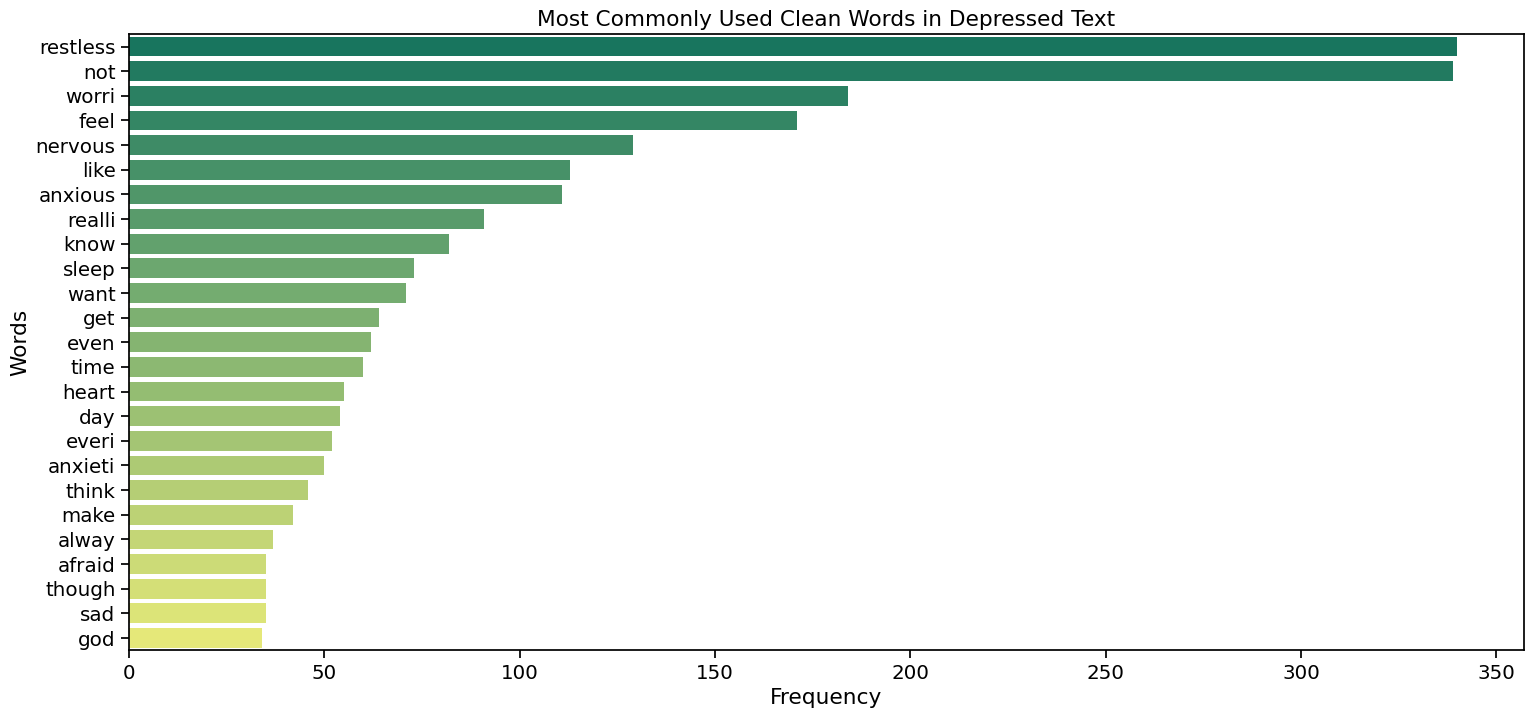

In [783]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_depressed_words = []
for sentence in df[df['label'] == 1.0]['text'].astype(str).tolist():
    processed_sentence = process_tweet(sentence)
    all_depressed_words.extend(processed_sentence)

data = pd.DataFrame(Counter(all_depressed_words).most_common(25), columns=['Word', 'Frequency'])

sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(18, 8))
sns.barplot(y=data['Word'], x=data['Frequency'], palette='summer')
plt.title("Most Commonly Used Clean Words in Depressed Text")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

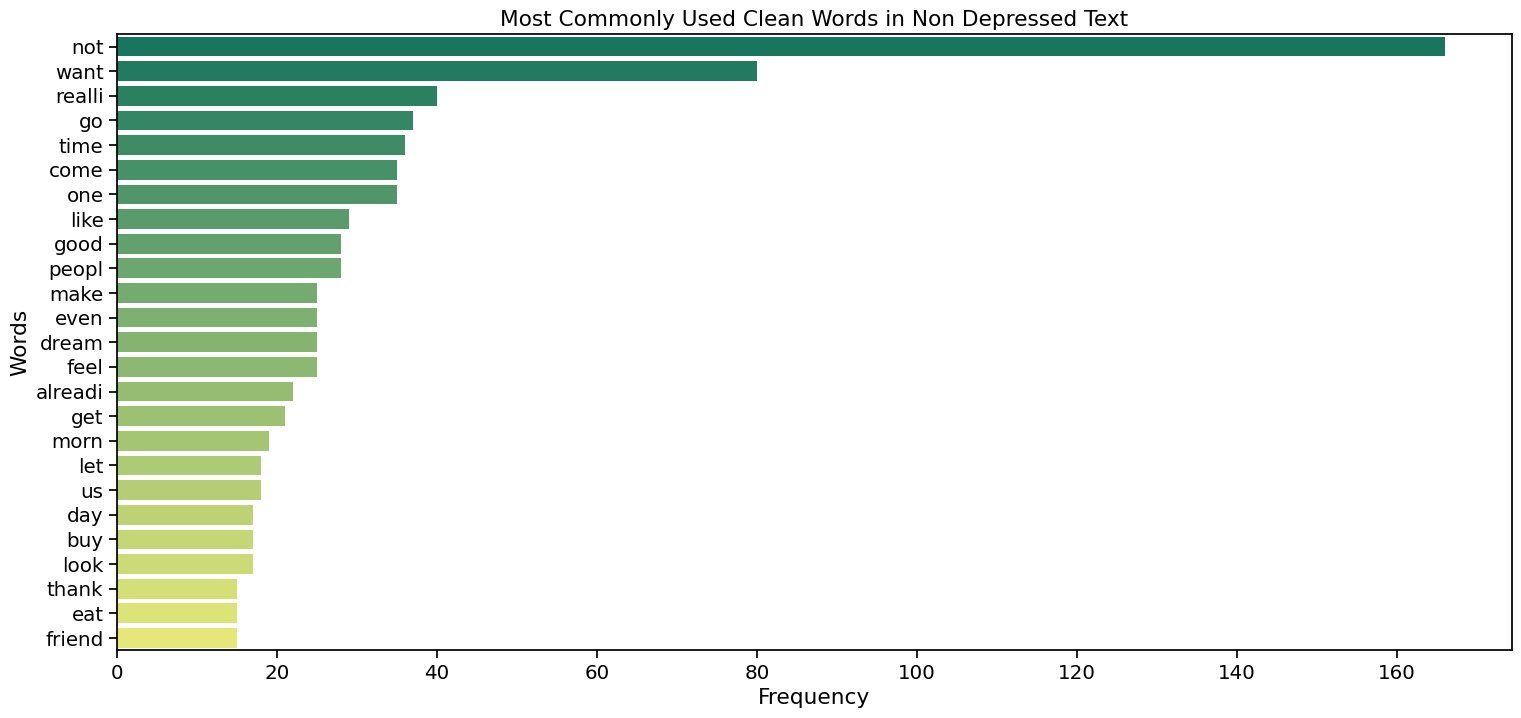

In [784]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_non_depressed_words = []
for sentence in df[df['label'] == 0.0]['text'].astype(str).tolist():
    processed_sentence = process_tweet(sentence)
    all_non_depressed_words.extend(processed_sentence)

data2 = pd.DataFrame(Counter(all_non_depressed_words).most_common(25), columns=['Word', 'Frequency'])

sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(18, 8))
sns.barplot(y=data2['Word'], x=data2['Frequency'], palette='summer')
plt.title("Most Commonly Used Clean Words in Non Depressed Text")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()